<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ThreePhaseInductance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector for Three-Phase Inductance</h1></b>

Dr. Bingsen Wang

7/27/2024
</center>

#Three-Phase Voltages

In three-phase power systems, the voltages are typically sinusoidal. The three phase voltages $v_1,v_2,v_3$ form a postive sequence.
$$
v_k = V\cos\left[\omega_e t+\theta -(k-1)\frac{2\pi}{3} \right]
\tag{1}$$

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{2}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

##Space Vector of Inductor Voltages

With reference to (1) and (2), the space vector of the inductor voltages is
$$\begin{align}
\underline v_L &= {2\over3}\left(v_a + v_be^{j\frac{2\pi}{3}} + v_ce^{j\frac{4\pi}{3}}\right)\\
&= {2V\over3}\left[\cos\left(\omega_e t+\theta\right) + \cos\left(\omega_e t+\theta - \frac{2\pi}{3} \right)e^{j\frac{2\pi}{3}} + \cos\left(\omega_e t+\theta + \frac{2\pi}{3} \right)e^{j\frac{4\pi}{3}}\right]
\end{align}\tag{3}$$

Based on Euler's identity $e^{jx}=\cos x + j\sin x$, the cosine function can be written in terms exponential functions.
$$\cos x = \frac{e^{jx} + e^{-jx}}{2}\tag{4}$$

Hence, (3) can be rewritten as
$$\begin{align}\underline v_L &= {2V\over3\times2}\begin{bmatrix}
e^{j\left(\omega_e t+\theta\right)} + e^{j\left(\omega_e t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{j\left(\omega_e t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}+\\
e^{-j\left(\omega_e t+\theta\right)} + e^{-j\left(\omega_e t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{-j\left(\omega_e t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}
\end{bmatrix}\\
&= Ve^{j(\omega_e t+\theta)}
\end{align}\tag{5}$$

##Three-Phase Currents and Space Vector

With reference to (1), the inductance currents $i_1,i_2,i_3$ are
$$
v_k = \frac{V}{\omega_eL}\sin\left[\omega_e t+\theta -(k-1)\frac{2\pi}{3} \right]
\tag{6}$$

The corresponding inductor current vector is
$$\underline{i}_L = \frac{V}{\omega_eL}e^{j(\omega_e+\theta-\frac{\pi}{2})}$$

#Python Code
The Python code illustrates the Clarke transformation and inverse for 5-phase system.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
0


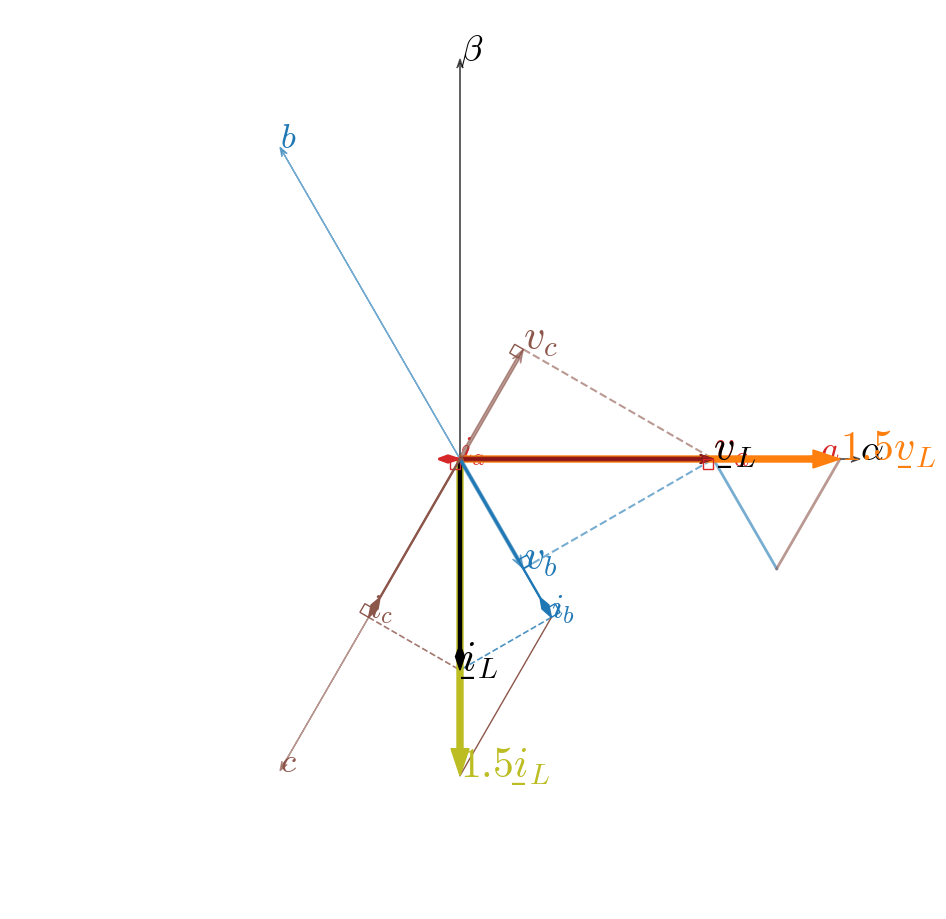

In [79]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,rc,transforms
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def f_abc(A,w,t,theta): #voltages in abc
  return A*array([cos(w*t+theta-k*2*pi/3) for k in range(3)])
def abc2ab(abc): #Clarke transformation, abc to alpha-beta
  x=0
  for k in range(3): x+=2/3*abc[k]*exp(1j*pi*k*2/3)
  return x

#parameters
Nfps = 900
V,fe,theta = 3.8,1,pi/3*0#voltage amplitude,frequency,phase
L=1.2/(2*pi*fe) #inductance
t=linspace(0,1/fe,Nfps)
wt = 2*pi*fe*t #angular frequency
vabc = f_abc(V,2*pi*fe,t,theta) #voltages in abc
iabc = f_abc(V/(2*pi*fe*L),2*pi*fe,t,theta-pi/2) #currents in abc
vab=abc2ab(vabc) #space vector in alpha-beta
iab=abc2ab(iabc) #space vector in alpha-beta

#plotting
xymax,xylim = 4,[-4.5,4.5]
clst=['tab:red','tab:blue','tab:brown','tab:purple','tab:green',
      'tab:olive','tab:orange','k','w'] #colors light bg
tns = ['$a$','$b$','$c$',
       r'$v_a$',r'$v_b$',r'$v_c$',
       r'$i_a$',r'$i_b$',r'$i_c$',
       r'$\alpha$',r'$\beta$'] #labels
fig = plt.figure(figsize=(9,9))
axs,lines,txts = [],[],[]
as1 = {'head_width':.06,'length_includes_head':True,'overhang':.5} #arr style
as2 = {'width':.06,'length_includes_head':True} #arr style
as3 = {'width':.03,'length_includes_head':True,'overhang':.4} #arr style
as4 = {'width':.01,'head_width':.08,'length_includes_head':True, 'overhang':-.8} #arr style for iabc vectors
as5 = {'width':.03,'length_includes_head':True,'overhang':-.6} #arr style
for k in range(2):
  axs.append(fig.add_axes((0,0,1,1),xlim=xylim,ylim=xylim,fc='none'))
  rot=transforms.Affine2D().rotate_around(0,0,pi/2*k)+axs[0].transData
  axs[0].add_patch(fa(0,0,xymax,0,**as1,transform=rot,color=clst[-2],alpha=.6))#ab ax
  axs[0].text((1-k)*xymax,k*xymax,tns[k+9],size=26) #ax labels
axs[0].set_axis_off()
for k in range(3):
  rot=transforms.Affine2D().rotate_around(0,0,2*pi/3*k-pi/2)+axs[0].transData
  lines.append(axs[0].plot([],[],'-',lw=3,transform=rot,color=clst[k],alpha=0.5)[0])#va,b,c
  lines.append(axs[0].plot([],[],'--',lw=1.5,transform=rot,color=clst[k],alpha=0.6)[0])
  lines.append(axs[0].plot([],[],'--',lw=1.5,color=clst[k],alpha=0.6)[0])
  lines.append(axs[0].plot([],[],'-',lw=1.2,transform=rot,color=clst[k],alpha=1)[0]) #ia,b,c
  lines.append(axs[0].plot([],[],'--',lw=1.2,transform=rot,color=clst[k],alpha=0.8)[0])
  lines.append(axs[0].plot([],[],'--',lw=1.2,color=clst[k],alpha=0.8)[0])
  lines.append(axs[0].plot([],[],'-',lw=2,color=clst[k],alpha=.6)[0]) #vabc vector sum
  lines.append(axs[0].plot([],[],'-',lw=1,color=clst[k])[0]) #iabc vevctor sum
  txts.append(axs[0].text(0,0,tns[3+k],size=30,transform=rot,color=clst[k])) #vabc text
  txts.append(axs[0].text(0,0,tns[6+k],size=25,transform=rot,color=clst[k])) #iabc text
  rot=transforms.Affine2D().rotate_around(0,0,pi*k*2/3)+axs[0].transData
  axs[0].add_patch(fa(0,0,.9*xymax,0,**as1,transform=rot,color=clst[k],alpha=.6))#abcde ax
  axs[0].text(.9*xymax,0,tns[k],size=25,transform=rot,color=clst[k]) #ax labels
lines.append(axs[0].plot([],[],':',lw=2,color=clst[-3])[0]) #v_alpha, v_beta
lines.append(axs[0].plot([],[],'-.',lw=2,color=clst[-4])[0]) #v_alpha, v_beta

def drawVectors_srf(ax,xymax,vabc,vab,iabc,iab,wt,clst): # in stationary reference frame
  ax.clear()
  ax.set_xlim(xylim)
  ax.set_ylim(xylim)
  ax.axis('off')
  ax.add_patch(fa(0,0,vab.real, vab.imag, **as2,color=clst[-3])) #sv_vab
  ax.text(vab.real,vab.imag,r'$1.5v\underbar_L$',size = 30,color=clst[-3])
  ax.add_patch(fa(0,0,vab.real*2/3, vab.imag*2/3, **as3,color=clst[-2])) #scaled
  ax.text(vab.real*2/3,vab.imag*2/3,r'$v\underbar_L$',size = 30,color=clst[-2])
  ax.add_patch(fa(0,0,iab.real, iab.imag, **as2,color=clst[-4])) #sv_iab
  ax.text(iab.real,iab.imag,r'$1.5i\underbar_L$',size = 30,color=clst[-4])
  ax.add_patch(fa(0,0,iab.real*2/3, iab.imag*2/3, **as5,color=clst[-2])) #scaled
  ax.text(iab.real*2/3,iab.imag*2/3,r'$i\underbar_L$',size = 30,color=clst[-2])
  for k in range(3):
    rot=transforms.Affine2D().rotate_around(0,0,2*pi/3*k)+ax.transData
    ax.add_patch(fa(0,0,vabc[k]*2/3,0,**as3,transform=rot,color=clst[k],alpha=0.6)) #vabc vectors
    ax.add_patch(mp.Rectangle((vabc[k]*2/3,0),0.1,0.1,angle=-90*np.heaviside(vabc[k],0)-90,
                              rotation_point='xy',transform=rot,color=clst[k],fc='none'))
    ax.add_patch(fa(0,0,iabc[k]*2/3,0,**as4,transform=rot,color=clst[k])) #iabc vectors
    ax.add_patch(mp.Rectangle((iabc[k]*2/3,0),0.1,0.1,angle=-90*np.heaviside(iabc[k],0)-90,
                              rotation_point='xy',transform=rot,color=clst[k],fc='none'))
  return

# animation function. This is called sequentially
def animate(i):
  # i=800
  if i%30==0: print(i) #for monitoring the progress
  for k in range(3):
    lines[8*k].set_data(.7*t[:i+1]/t[-1]*xymax,vabc[k,:i+1]*2/3) #va,b,c
    lines[8*k+1].set_data([0,.7*t[i]/t[-1]*xymax],[vabc[k,i]*2/3,vabc[k,i]*2/3])
    lines[8*k+2].set_data([vabc[k,i]*cos(k*2*pi/3)*2/3,vab[i].real*2/3],[vabc[k,i]*sin(k*2*pi/3)*2/3,vab[i].imag*2/3])
    lines[8*k+3].set_data(.7*t[:i+1]/t[-1]*xymax,iabc[k,:i+1]*2/3) #ia,b,c
    lines[8*k+4].set_data([0,.7*t[i]/t[-1]*xymax],[iabc[k,i]*2/3,iabc[k,i]*2/3])
    lines[8*k+5].set_data([iabc[k,i]*cos(k*2*pi/3)*2/3,iab[i].real*2/3],[iabc[k,i]*sin(k*2*pi/3)*2/3,iab[i].imag*2/3])
    if k>0:
      v2,i2=0,0
      for kk in range(k+1):
        v2+=vabc[kk,i]*2/3*exp(1j*pi*kk*2/3)
        i2+=iabc[kk,i]*2/3*exp(1j*pi*kk*2/3)
      v1=v2 - vabc[k,i]*2/3*exp(1j*pi*k*2/3)
      i1=i2 - iabc[k,i]*2/3*exp(1j*pi*k*2/3)
      lines[8*k+6].set_data([v1.real,v2.real],[v1.imag,v2.imag])
      lines[8*k+7].set_data([i1.real,i2.real],[i1.imag,i2.imag])
    txts[2*k].set_position((.7*t[i]/t[-1]*xymax,vabc[k,i]*2/3))
    txts[2*k+1].set_position((.7*t[i]/t[-1]*xymax,iabc[k,i]*2/3))
  lines[24].set_data(vab[:i+1].real,vab[:i+1].imag) #vab traj
  lines[25].set_data(iab[:i+1].real,iab[:i+1].imag) #iab traj
  drawVectors_srf(axs[1],xymax,vabc[:,i],vab[i],iabc[:,i],iab[i],wt[i],clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps, interval=50)
fn = r"SpaceVector_ThreePhaseInductance.mp4"
writervideo = animation.FFMpegWriter(fps=40)
anim.save(fn, writer=writervideo,dpi = 200)